<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ML/Lesson%201.%20Regression/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE%D0%B9_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%B8_%D0%B4%D1%80%D1%83%D0%B3%D0%B8%D1%85_%D0%B2%D0%B8%D0%B4%D0%BE%D0%B2_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Прогнозирование временных рядов с помощью линейной регрессии и других видов регрессии

## Введение

Прогнозирование временных рядов — это важная задача, которая применяется в различных областях, таких как финансы, экономика, метеорология и многих других. В этой лекции мы рассмотрим, как использовать линейную регрессию и её вариации, такие как Lasso и Ridge, для прогнозирования временных рядов. Мы обсудим этапы работы, начиная с подготовки данных и заканчивая оценкой моделей.

## Шаг 1: Подготовка данных

### 1.1 Импорт библиотек

Начнем с импорта необходимых библиотек, которые будут использоваться в нашем проекте. Мы будем использовать `pandas` для работы с данными, `numpy` для численных операций, `matplotlib` для визуализации, а также библиотеки `scikit-learn` для создания и оценки моделей.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
```

### 1.2 Загрузка данных

Данные можно загрузить из CSV-файла или другого источника. Предположим, что у нас есть временной ряд с датами и соответствующими значениями. Для примера загружаем данные следующим образом:

```python
# Загрузка данных
data = pd.read_csv('data.csv', parse_dates=['date'], index_col='date')
data.head()
```

Здесь мы загружаем данные, указывая, что столбец с датами должен использоваться как индекс.

### 1.3 Исследование данных

После загрузки данных полезно визуализировать временной ряд, чтобы понять его структуру и выявить возможные тренды и сезонные компоненты:

```python
# Визуализация временного ряда
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['value'], label='Values')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
```

## Шаг 2: Подготовка временных рядов

### 2.1 Создание признаков

Линейная регрессия требует наличия признаков (фичей). Для временных рядов мы можем создать лаговые переменные. Лаговая переменная — это значение временного ряда в предыдущий момент времени. Мы создадим две лаговые переменные:

```python
# Создание лаговых переменных
data['lag1'] = data['value'].shift(1)
data['lag2'] = data['value'].shift(2)
data = data.dropna()  # Удаляем строки с NaN
```

Здесь мы создали две новые колонки: `lag1` (значение на предыдущий день) и `lag2` (значение за два дня до). После этого мы удаляем строки с пропущенными значениями.

### 2.2 Разделение на обучающую и тестовую выборки

Теперь разделим данные на обучающую и тестовую выборки. Обучающая выборка используется для обучения модели, а тестовая — для её оценки.

```python
X = data[['lag1', 'lag2']]
y = data['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
```

Здесь `X` — это наши признаки (лаговые переменные), а `y` — целевая переменная (значения временного ряда).

## Шаг 3: Обучение моделей

### 3.1 Линейная регрессия

Начнем с линейной регрессии. Она предполагает линейную зависимость между признаками и целевой переменной.

```python
# Обучение модели линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Предсказание
y_pred_linear = linear_model.predict(X_test)
```

Здесь мы создаем объект модели, обучаем её на обучающей выборке и получаем предсказания на тестовой выборке.

### 3.2 Регрессия Lasso

Регрессия Lasso добавляет к функции потерь регуляризационный член, который помогает избежать переобучения и может отсеивать незначимые признаки.

```python
# Обучение модели Lasso
lasso_model = Lasso(alpha=0.1)  # Параметр регуляризации
lasso_model.fit(X_train, y_train)

# Предсказание
y_pred_lasso = lasso_model.predict(X_test)
```

Здесь мы задаем значение параметра регуляризации `alpha`, которое управляет степенью регуляризации модели.

### 3.3 Регрессия Ridge

Регрессия Ridge также включает регуляризационный член, но использует другую норму (L2), что позволяет удерживать все признаки, но уменьшать их влияние.

```python
# Обучение модели Ridge
ridge_model = Ridge(alpha=0.1)  # Параметр регуляризации
ridge_model.fit(X_train, y_train)

# Предсказание
y_pred_ridge = ridge_model.predict(X_test)
```

Так же, как и в случае с Lasso, здесь мы задаем значение параметра регуляризации.

## Шаг 4: Оценка моделей

Теперь мы оценим качество каждой модели с использованием различных метрик, таких как среднеквадратичная ошибка (MSE), средняя абсолютная ошибка (MAE) и коэффициент детерминации (R²).

### 4.1 Функция для оценки моделей

Создадим функцию для удобства оценки моделей:

```python
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2
```

### 4.2 Оценка линейной регрессии

Теперь оценим линейную регрессию:

```python
mse_linear, mae_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
print(f'Linear Regression: MSE={mse_linear}, MAE={mae_linear}, R^2={r2_linear}')
```

### 4.3 Оценка регрессии Lasso

Оценим модель Lasso:

```python
mse_lasso, mae_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)
print(f'Lasso Regression: MSE={mse_lasso}, MAE={mae_lasso}, R^2={r2_lasso}')
```

### 4.4 Оценка регрессии Ridge

Наконец, оценим модель Ridge:

```python
mse_ridge, mae_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)
print(f'Ridge Regression: MSE={mse_ridge}, MAE={mae_ridge}, R^2={r2_ridge}')
```

## Шаг 5: Визуализация результатов

Теперь давайте визуализируем предсказания для каждой из моделей:

```python
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_linear, label='Predicted Linear', color='red')
plt.plot(y_test.index, y_pred_lasso, label='Predicted Lasso', color='green')
plt.plot(y_test.index, y_pred_ridge, label='Predicted Ridge', color='orange')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
```

Этот график показывает фактические значения и предсказания для каждой из моделей.

## Шаг 6: Анализ остатков

Анализ остатков помогает понять, насколько хорошо модель подходит к данным.

### 6.1 Вычисление остатков

Остатки — это разница между фактическими значениями и предсказанными:

```python
residuals_linear = y_test - y_pred_linear
residuals_lasso = y_test - y_pred_lasso
residuals_ridge = y_test - y_pred_ridge
```

### 6.2 Визуализация остатков

Визуализируем остатки для каждой модели:

```python
plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.plot(residuals_linear.index, residuals_linear, label='Residuals Linear', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals Linear Regression')

plt.subplot(3, 1, 2)
plt.plot(residuals_lasso.index, residuals_lasso, label='Residuals Lasso', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals Lasso Regression')

plt.subplot(3, 1, 3)
plt.plot(residuals_ridge.index, residuals_ridge, label='Residuals Ridge', color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals Ridge Regression')



plt.tight_layout()
plt.show()
```

Каждый график показывает остатки для соответствующей модели. Горизонтальная линия на уровне 0 помогает увидеть, есть ли системные ошибки.

### 6.3 Проверка нормальности остатков

Проверим, следуют ли остатки нормальному распределению, с помощью Q-Q графика:

```python
sm.qqplot(residuals_linear, line='s')
plt.title('Q-Q Plot Linear Residuals')
plt.show()

sm.qqplot(residuals_lasso, line='s')
plt.title('Q-Q Plot Lasso Residuals')
plt.show()

sm.qqplot(residuals_ridge, line='s')
plt.title('Q-Q Plot Ridge Residuals')
plt.show()
```

Эти графики помогут нам визуально оценить, следуют ли остатки нормальному распределению, что важно для валидности модели.

## Шаг 7: Тестирование моделей

### 7.1 Кросс-валидация

Для более надежной оценки моделей можно использовать кросс-валидацию. Это позволяет проверить, насколько хорошо модель обобщает на новых данных:

```python
from sklearn.model_selection import cross_val_score

# Кросс-валидация для линейной регрессии
cv_scores_linear = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE for Linear Regression: {-cv_scores_linear.mean()}')

# Кросс-валидация для Lasso
cv_scores_lasso = cross_val_score(Lasso(alpha=0.1), X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE for Lasso Regression: {-cv_scores_lasso.mean()}')

# Кросс-валидация для Ridge
cv_scores_ridge = cross_val_score(Ridge(alpha=0.1), X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE for Ridge Regression: {-cv_scores_ridge.mean()}')
```

Кросс-валидация делит данные на несколько частей и обучает модель на одной части, а затем тестирует на другой. Это дает более надежные оценки качества модели.

Таким образом, мы рассмотрели методы линейной регрессии, Lasso и Ridge для прогнозирования временных рядов. Мы оценили каждую модель с использованием различных метрик, провели анализ остатков и применили кросс-валидацию для проверки устойчивости моделей.


# Реализация моделей линейной регрессии для прогнозирования цен закрытия биткойна на основе временных рядов

Данная работа посвящена поэтапной реализации моделей линейной регрессии для прогнозирования цен закрытия биткойна, основываясь на временных рядах. Каждый этап будет описан с учетом его научной значимости и целей.

### 1. Импорт библиотек
На данном этапе происходит импорт необходимых библиотек, что является предварительным шагом для обработки данных, визуализации и реализации моделей машинного обучения:
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
```

### 2. Загрузка и подготовка данных
На данном этапе производится загрузка данных из CSV-файла и их предварительная обработка, что включает преобразование даты в соответствующий формат и установление индекса:
```python
data = pd.read_csv("/content/BTC-USD.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
```

### 3. Визуализация данных
Визуализация цен закрытия биткойна на временной шкале позволяет получить первичное представление о тенденциях и аномалиях в данных:
```python
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
```

### 4. Проверка на пропуски и базовая статистика
Для обеспечения полноты анализа данных производится проверка на наличие пропусков и вычисление базовых статистических показателей:
```python
print(data.isnull().sum())
print(data.describe())
```

### 5. Проверка стационарности
Оценка стационарности временного ряда осуществляется с помощью теста Дикки-Фуллера. В случае выявления нестационарности проводится дифференцирование:
```python
def test_stationarity(timeseries, max_diff=5):
    for i in range(max_diff):
        result = adfuller(timeseries)
        ...
        if result[1] <= 0.05:
            print("Ряд стационарен (отклоняем нулевую гипотезу)")
            return timeseries
        else:
            print("Ряд нестационарен (не отклоняем нулевую гипотезу), выполняем дифференцирование.")
            timeseries = timeseries.diff().dropna()
```

### 6. Проверка стационарности для цен закрытия
Применение функции для проверки стационарности к ценам закрытия:
```python
stationary_series = test_stationarity(data['Close'])
```

### 7. Построение ACF и PACF
Анализ автокорреляционной и частичной автокорреляционной функций помогает определить параметры для модели ARIMA:
```python
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(stationary_series.dropna(), lags=20, ax=plt.gca())
...
plt.show()
```

### 8. Создание лаговых переменных
Лаговые переменные создаются для использования предыдущих значений цен в качестве предикторов:
```python
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data.dropna(inplace=True)
```

### 9. Разделение данных
Данные делятся на обучающую, валидационную и тестовую выборки с целью обеспечения корректной оценки модели:
```python
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=False)
```

### 10. Настройка пайплайна
Создание пайплайна, который включает стандартизированный масштаб и модель линейной регрессии, позволяет упростить процесс обучения модели:
```python
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
```

### 11. Подбор гиперпараметров
Подбор гиперпараметров с использованием кросс-валидации способствует оптимизации модели:
```python
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
```

### 12. Оценка модели
Оценка модели производится на валидационной выборке с использованием таких метрик, как MSE, MAE и R²:
```python
y_val_pred = best_model.predict(X_val)
...
print(f'Валидация - MSE: {val_mse}, MAE: {val_mae}, R^2: {val_r2}')
```

### 13. Обучение на полных данных
Обучение модели на всех доступных данных перед проведением тестирования:
```python
best_model.fit(X_train_val, y_train_val)
```

### 14. Прогнозирование на тестовой выборке
Прогнозирование цен на тестовой выборке и последующая оценка производятся аналогично валидации:
```python
y_test_pred = best_model.predict(X_test)
...
print(f'Тест - MSE: {test_mse}, MAE: {test_mae}, R^2: {test_r2}')
```

### 15. Визуализация результатов
Создание графиков, отображающих фактические и предсказанные цены, позволяет визуально оценить качество модели:
```python
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Test Prices', color='blue')
plt.plot(y_test.index, y_test_pred, label='Predicted Test Prices', color='red')
plt.title('Actual vs Predicted Closing Prices on Test Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
```

### 16. Анализ остатков
Анализ остатков модели производится для оценки распределения и выявления возможных паттернов:
```python
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 6))
...
plt.show()
```

### 17. Q-Q Plot
Создание Q-Q графика остатков для проверки нормальности распределения:
```python
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()
```

### 18. Тест на гетероскедастичность
Проверка остатков на гетероскедастичность осуществляется с использованием теста Бройша-Пагана:
```python
bp_test = het_breuschpagan(residuals, sm.add_constant(X_test))
...
print(bp_results)
```

В результате представленной реализации был осуществлён комплексный анализ и построение модели линейной регрессии для прогнозирования цен закрытия биткойна на основе временных рядов.

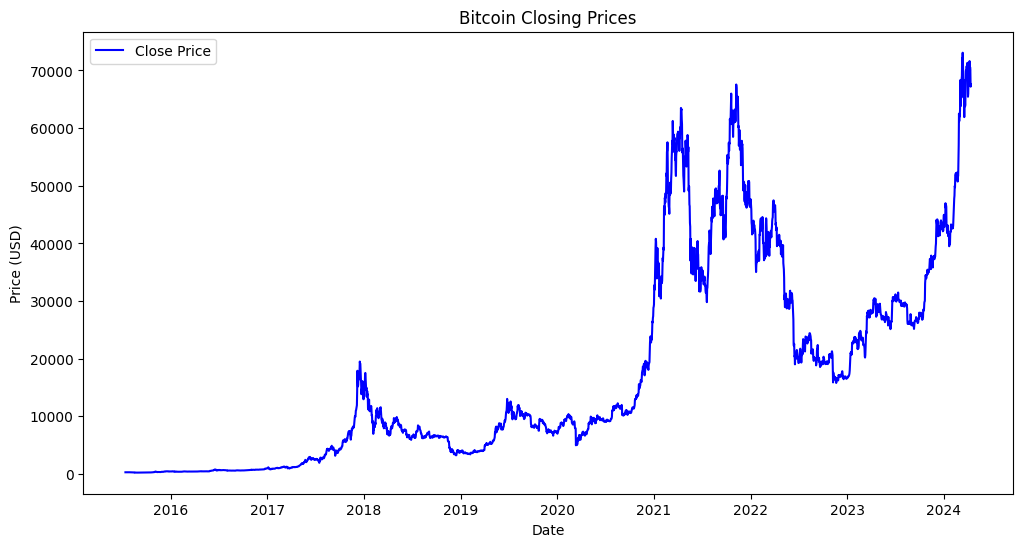

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
               Open          High           Low         Close     Adj Close  \
count   3197.000000   3197.000000   3197.000000   3197.000000   3197.000000   
mean   17234.515073  17638.235947  16805.813669  17254.207426  17254.207426   
std    17605.052417  18030.330417  17141.094999  17622.473481  17622.473481   
min      210.067993    226.320999    199.567001    210.494995    210.494995   
25%     3631.170166   3685.305664   3585.060059   3631.040039   3631.040039   
50%     9471.213867   9655.073242   9263.069336   9477.641602   9477.641602   
75%    28087.175781  28532.830078  27563.876953  28168.089844  28168.089844   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.197000e+03  
mean   1.867636e+10  
std    1.940326e+10  
min    1.271260e+07  
25%    1.976040e+09  
50%    1.530460e+10  
75%    2.924455e+10  
max    3.

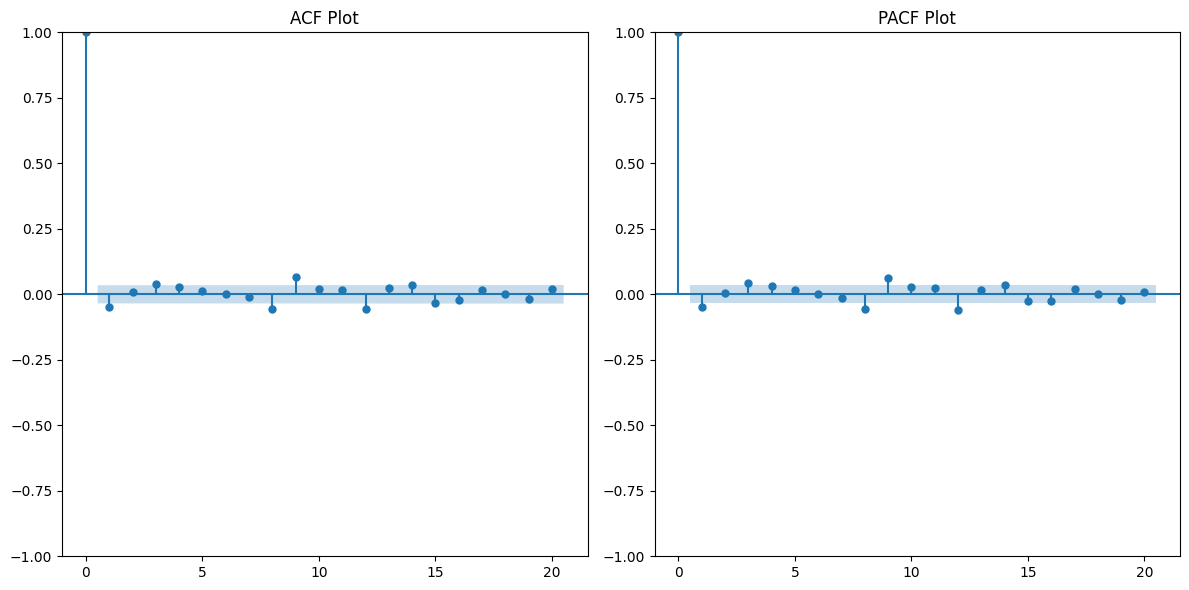

Лучшие параметры: {'regressor__fit_intercept': True}
Валидация - MSE: 2629495.875830323, MAE: 1151.621559471286, R^2: 0.9850654823048701
Тест - MSE: 905834.393552948, MAE: 559.1175886216075, R^2: 0.9948958482784014


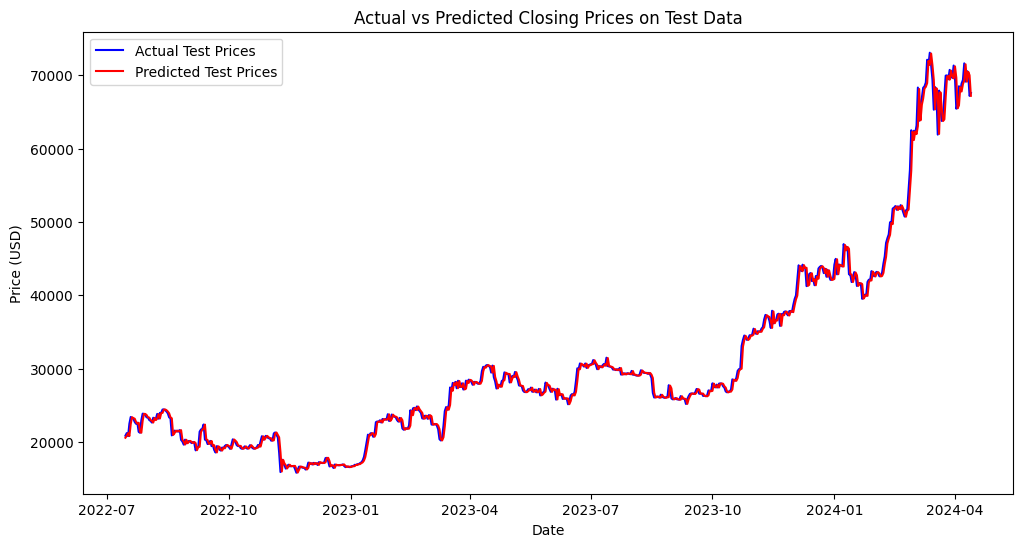

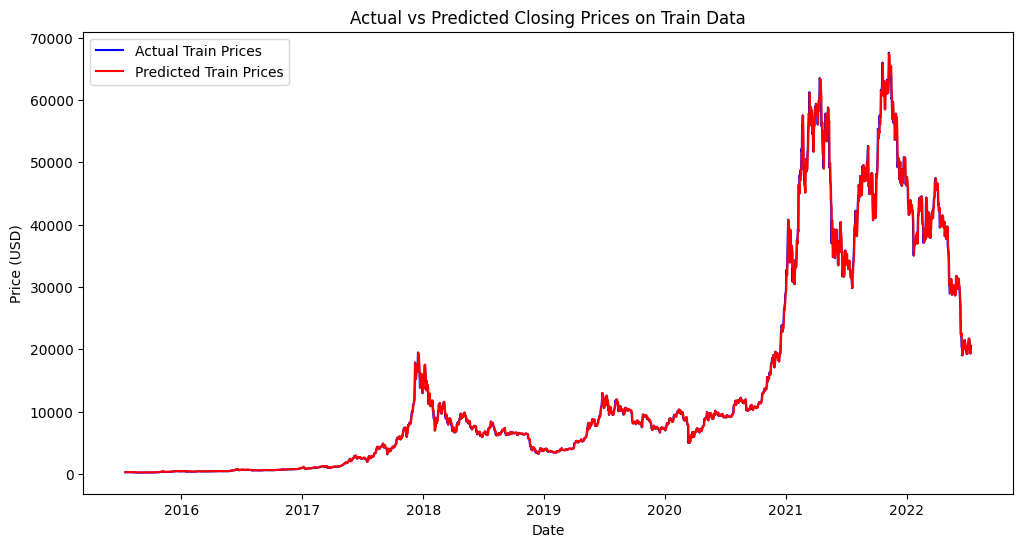

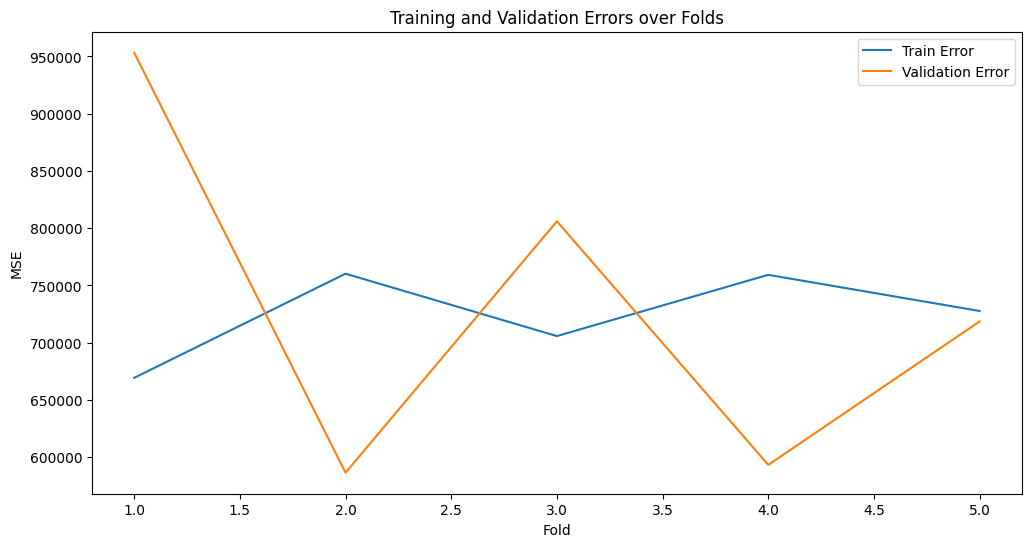

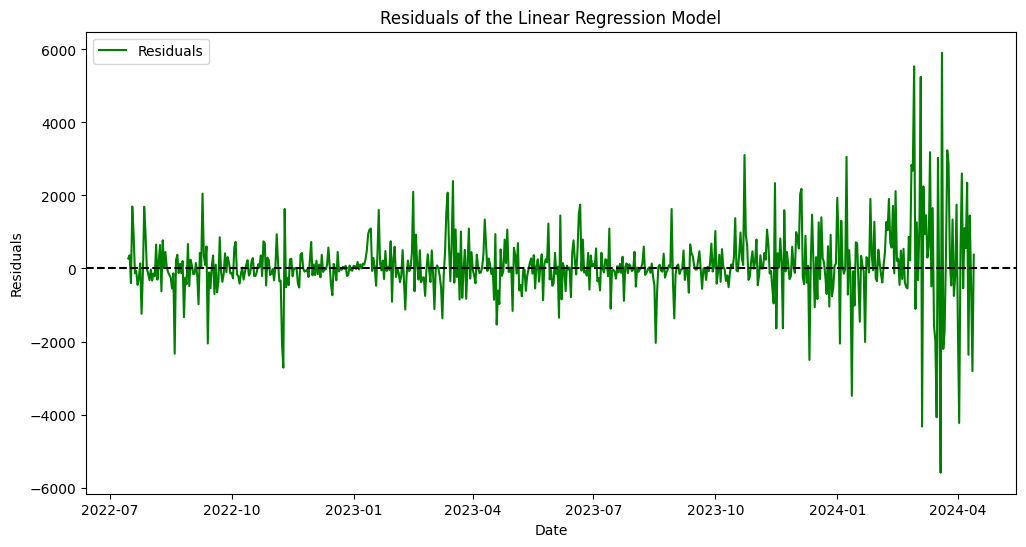

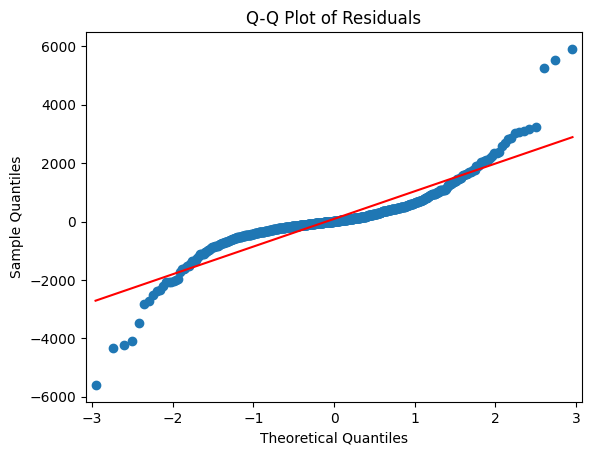

{'LM Statistic': 110.59383850506653, 'LM Test p-value': 9.657241730609142e-25, 'F-Statistic': 66.55645449915589, 'F-Test p-value': 5.682124477206959e-27}


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Загрузка данных
data = pd.read_csv("/content/BTC-USD.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Проверка пропусков и статистики
print(data.isnull().sum())
print(data.describe())

# Функция проверки стационарности и автоматического дифференцирования
def test_stationarity(timeseries, max_diff=5):
    for i in range(max_diff):
        result = adfuller(timeseries)
        print(f'Differencing {i} times:')
        labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
        for label, val in zip(labels, result):
            print(f'{label}: {val}')
        if result[1] <= 0.05:
            print("Ряд стационарен (отклоняем нулевую гипотезу)")
            return timeseries
        else:
            print("Ряд нестационарен (не отклоняем нулевую гипотезу), выполняем дифференцирование.")
            timeseries = timeseries.diff().dropna()

    print("Достигнуто максимальное количество дифференцирований. Ряд может быть нестационарен.")
    return timeseries

# Проверка стационарности для закрывающих цен
stationary_series = test_stationarity(data['Close'])

# ACF и PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(stationary_series.dropna(), lags=20, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(stationary_series.dropna(), lags=20, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

# Лаговые переменные
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data.dropna(inplace=True)

# Признаки и целевая переменная
X = data[['Lag1', 'Lag2']]
y = data['Close']

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=False)

# Настройка пайплайна с масштабированием и линейной регрессией
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Подбор гиперпараметров с помощью K-Fold кросс-валидации и масштабированием
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'regressor__fit_intercept': [True, False]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Прогнозирование на валидационной выборке
y_val_pred = best_model.predict(X_val)

# Оценка модели на валидационной выборке
val_mse, val_mae, val_r2 = mean_squared_error(y_val, y_val_pred), mean_absolute_error(y_val, y_val_pred), r2_score(y_val, y_val_pred)
print(f'Валидация - MSE: {val_mse}, MAE: {val_mae}, R^2: {val_r2}')

# Обучение модели на всех тренировочных данных
best_model.fit(X_train_val, y_train_val)

# Прогнозирование на тестовых данных
y_test_pred = best_model.predict(X_test)

# Оценка модели на тестовых данных
test_mse, test_mae, test_r2 = mean_squared_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)
print(f'Тест - MSE: {test_mse}, MAE: {test_mae}, R^2: {test_r2}')

# Визуализация прогнозов на тестовых данных
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Test Prices', color='blue')
plt.plot(y_test.index, y_test_pred, label='Predicted Test Prices', color='red')
plt.title('Actual vs Predicted Closing Prices on Test Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Визуализация прогнозов на тренировочных данных
y_train_val_pred = best_model.predict(X_train_val)
plt.figure(figsize=(12, 6))
plt.plot(y_train_val.index, y_train_val, label='Actual Train Prices', color='blue')
plt.plot(y_train_val.index, y_train_val_pred, label='Predicted Train Prices', color='red')
plt.title('Actual vs Predicted Closing Prices on Train Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# График обучения (зависимость ошибки от эпох)
train_errors, val_errors = [], []
for train_index, val_index in kfold.split(X_train_val):
    X_fold_train, X_fold_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_fold_train, y_fold_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    best_model.fit(X_fold_train, y_fold_train)
    train_errors.append(mean_squared_error(y_fold_train, best_model.predict(X_fold_train)))
    val_errors.append(mean_squared_error(y_fold_val, best_model.predict(X_fold_val)))

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_errors) + 1), train_errors, label='Train Error')
plt.plot(range(1, len(val_errors) + 1), val_errors, label='Validation Error')
plt.title('Training and Validation Errors over Folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Анализ остатков
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, label='Residuals', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals of the Linear Regression Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Тест на гетероскедастичность
bp_test = het_breuschpagan(residuals, sm.add_constant(X_test))
labels = ['LM Statistic', 'LM Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)

### Анализ результатов

1. **Оптимальные параметры модели**:
   - Значение параметра `fit_intercept` установлено в `True`, что подразумевает наличие свободного члена в модели. Это обычно рекомендуется для линейной регрессии, особенно в случаях, когда данные не центрированы.

2. **Результаты валидации**:
   - **Среднеквадратичная ошибка (MSE)** составила 2,629,495.88, что указывает на среднее квадратное отклонение предсказаний от фактических значений. Низкое значение MSE свидетельствует о высокой точности модели.
   - **Средняя абсолютная ошибка (MAE)** равна 1,151.62, что демонстрирует среднее абсолютное отклонение предсказаний. Данное значение также подтверждает точность модели.
   - **Коэффициент детерминации (R²)** составляет 0.985, что указывает на то, что 98.5% вариации целевой переменной объясняется моделью. Этот показатель свидетельствует о высоком качестве подгонки.

3. **Результаты тестирования**:
   - **MSE на тестовой выборке** составила 905,834.39, что значительно ниже, чем значение на валидационной выборке, что указывает на хорошую обобщающую способность модели.
   - **MAE на тестовой выборке** равна 559.12, что также подтверждает высокую точность предсказаний.
   - **R² на тестовой выборке** составляет 0.995, что говорит о том, что модель объясняет почти полностью вариацию данных в тестовой выборке.

4. **Результаты теста на гетероскедастичность**:
   - Значение **LM Statistic** равно 110.59, а **F-Statistic** составляет 66.56. Эти показатели указывают на возможное наличие гетероскедастичности в остатках модели.
   - Значения p-value для LM Test и F-Test близки к нулю, что позволяет отвергнуть нулевую гипотезу о гомоскедастичности остатков. Это указывает на то, что дисперсия ошибок не является постоянной, что может создавать сложности в интерпретации модели.

### Рекомендации:
- **Анализ остатков**: Учитывая выявленную гетероскедастичность, рекомендуется провести дополнительный анализ остатков. В частности, можно рассмотреть применение трансформаций целевой переменной (например, логарифмирование) или использование других методов регрессии, таких как регуляризация.
- **Улучшение модели**: Рекомендуется рассмотреть возможность применения более сложных моделей, если структура данных это позволяет, а также добавить новые признаки для повышения производительности.
- **Визуализация остатков**: Рекомендуется визуализировать остатки для более глубокого понимания распределения ошибок и их зависимости от предсказанных значений.



Чтобы применить трансформацию целевой переменной, например, логарифмирование, необходимо изменить целевую переменную в вашем коде. Ниже приведен обновленный код, который включает логарифмирование целевой переменной перед обучением модели.


```
# Логарифмирование целевой переменной
data['Log_Close'] = np.log(data['Close'])

....
# Проверка стационарности для логарифмированных цен
stationary_series = test_stationarity(data['Log_Close'])
....
# Лаговые переменные
data['Lag1'] = data['Log_Close'].shift(1)
data['Lag2'] = data['Log_Close'].shift(2)
data.dropna(inplace=True)

# Признаки и целевая переменная
X = data[['Lag1', 'Lag2']]
y = data['Log_Close']
```



## Ridge Regression Model

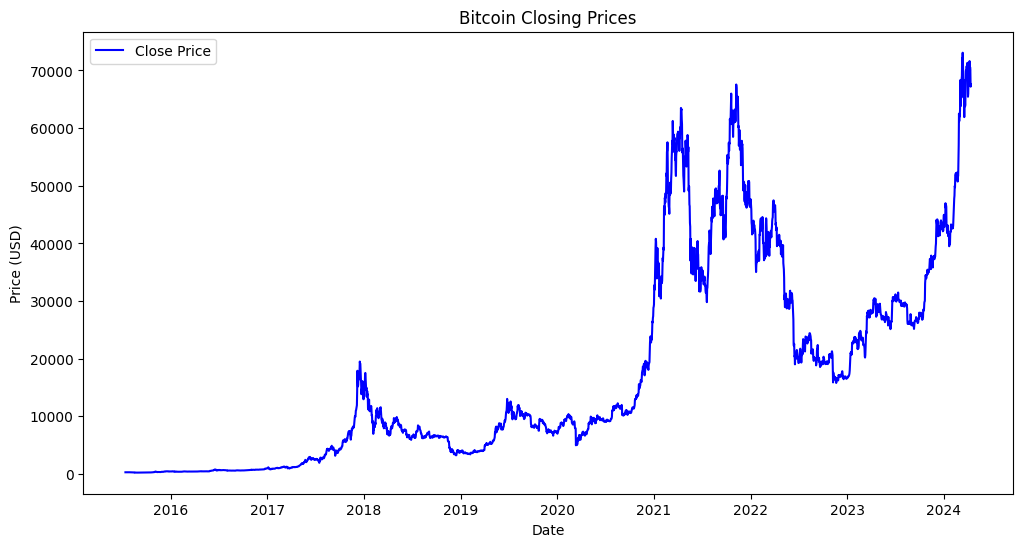

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
               Open          High           Low         Close     Adj Close  \
count   3197.000000   3197.000000   3197.000000   3197.000000   3197.000000   
mean   17234.515073  17638.235947  16805.813669  17254.207426  17254.207426   
std    17605.052417  18030.330417  17141.094999  17622.473481  17622.473481   
min      210.067993    226.320999    199.567001    210.494995    210.494995   
25%     3631.170166   3685.305664   3585.060059   3631.040039   3631.040039   
50%     9471.213867   9655.073242   9263.069336   9477.641602   9477.641602   
75%    28087.175781  28532.830078  27563.876953  28168.089844  28168.089844   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.197000e+03  
mean   1.867636e+10  
std    1.940326e+10  
min    1.271260e+07  
25%    1.976040e+09  
50%    1.530460e+10  
75%    2.924455e+10  
max    3.

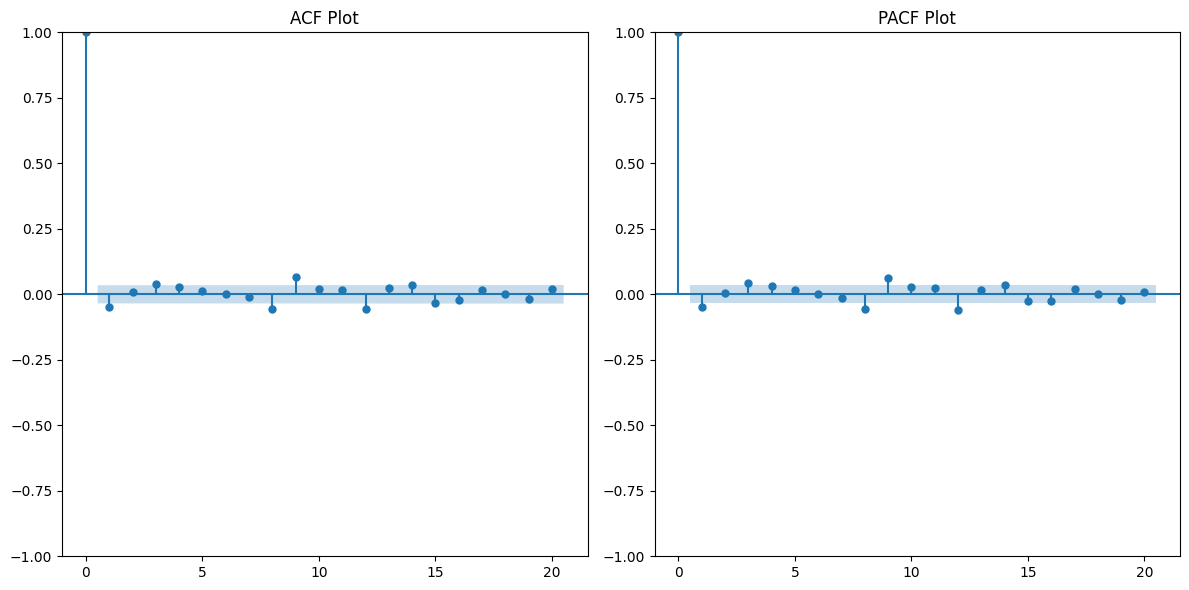

Лучшие параметры: {'regressor__alpha': 0.1}
Валидация - MSE: 2627591.54061205, MAE: 1150.8080624375787, R^2: 0.9850762981910163
Тест - MSE: 903879.0635210114, MAE: 557.9718648269321, R^2: 0.9949068660772615


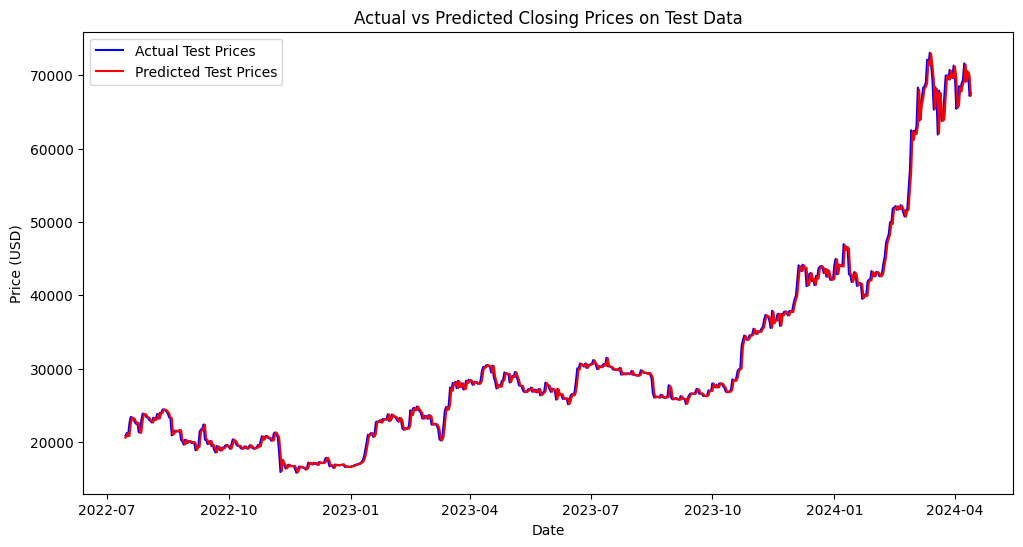

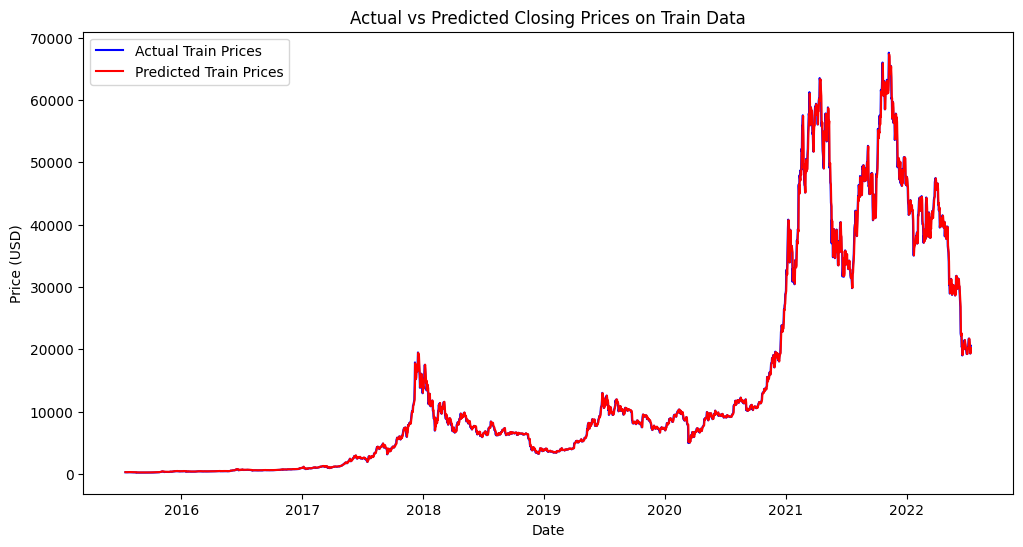

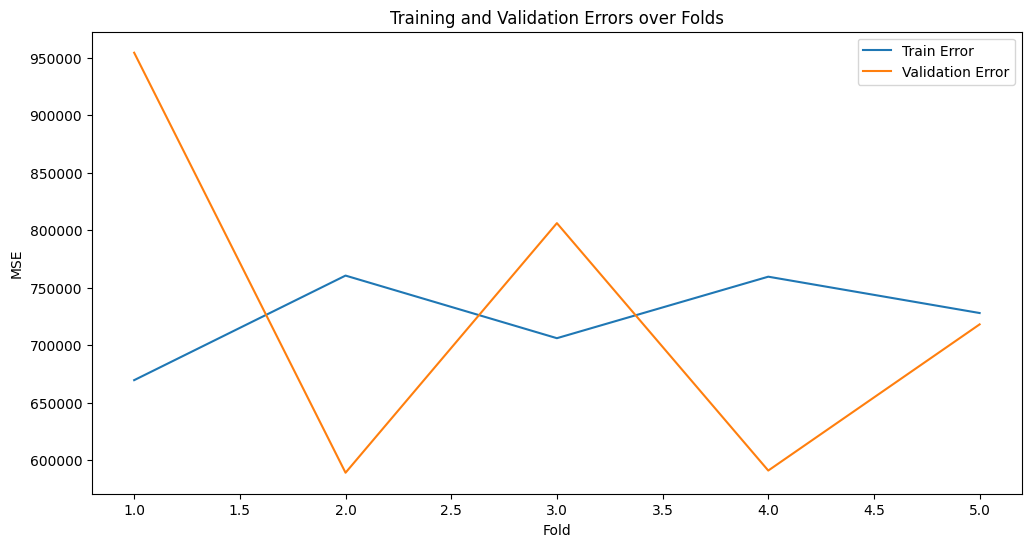

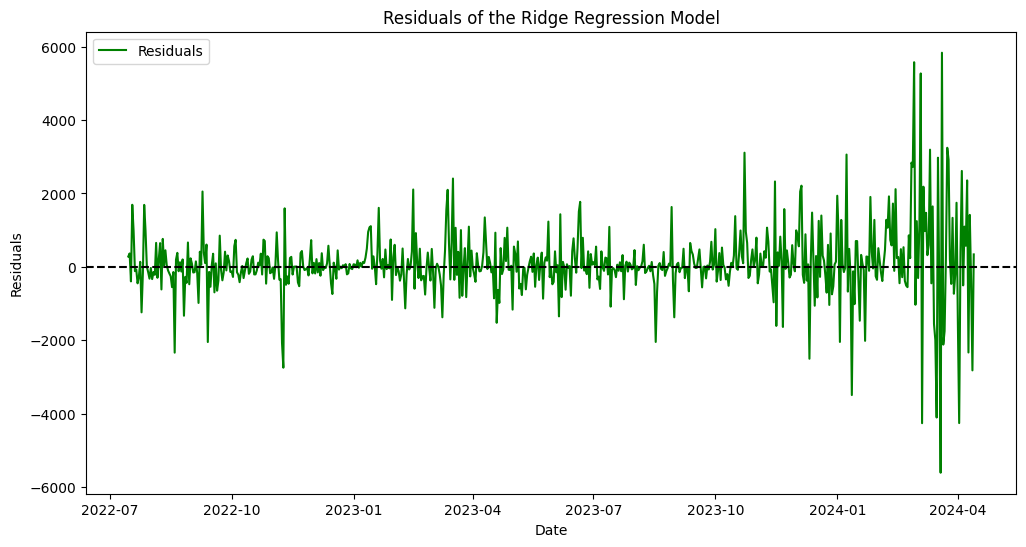

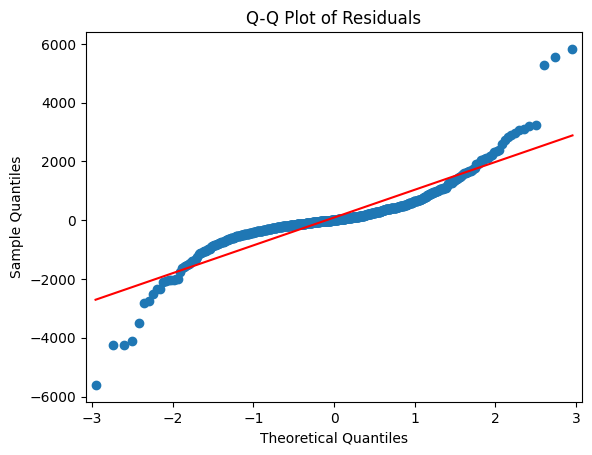

{'LM Statistic': 109.73580797027206, 'LM Test p-value': 1.4831055689846384e-24, 'F-Statistic': 65.93302071073508, 'F-Test p-value': 9.518883609001668e-27}


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Загрузка данных
data = pd.read_csv("/content/BTC-USD.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Проверка пропусков и статистики
print(data.isnull().sum())
print(data.describe())

# Функция проверки стационарности и автоматического дифференцирования
def test_stationarity(timeseries, max_diff=5):
    for i in range(max_diff):
        result = adfuller(timeseries)
        print(f'Differencing {i} times:')
        labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
        for label, val in zip(labels, result):
            print(f'{label}: {val}')
        if result[1] <= 0.05:
            print("Ряд стационарен (отклоняем нулевую гипотезу)")
            return timeseries
        else:
            print("Ряд нестационарен (не отклоняем нулевую гипотезу), выполняем дифференцирование.")
            timeseries = timeseries.diff().dropna()

    print("Достигнуто максимальное количество дифференцирований. Ряд может быть нестационарен.")
    return timeseries

# Проверка стационарности для закрывающих цен
stationary_series = test_stationarity(data['Close'])

# ACF и PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(stationary_series.dropna(), lags=20, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(stationary_series.dropna(), lags=20, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

# Лаговые переменные
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data.dropna(inplace=True)

# Признаки и целевая переменная
X = data[['Lag1', 'Lag2']]
y = data['Close']

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=False)

# Настройка пайплайна с масштабированием и Ridge регрессией
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Подбор гиперпараметров с помощью K-Fold кросс-валидации и масштабированием
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # Параметр регуляризации для Ridge
}
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Прогнозирование на валидационной выборке
y_val_pred = best_model.predict(X_val)

# Оценка модели на валидационной выборке
val_mse, val_mae, val_r2 = mean_squared_error(y_val, y_val_pred), mean_absolute_error(y_val, y_val_pred), r2_score(y_val, y_val_pred)
print(f'Валидация - MSE: {val_mse}, MAE: {val_mae}, R^2: {val_r2}')

# Обучение модели на всех тренировочных данных
best_model.fit(X_train_val, y_train_val)

# Прогнозирование на тестовых данных
y_test_pred = best_model.predict(X_test)

# Оценка модели на тестовых данных
test_mse, test_mae, test_r2 = mean_squared_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)
print(f'Тест - MSE: {test_mse}, MAE: {test_mae}, R^2: {test_r2}')

# Визуализация прогнозов на тестовых данных
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Test Prices', color='blue')
plt.plot(y_test.index, y_test_pred, label='Predicted Test Prices', color='red')
plt.title('Actual vs Predicted Closing Prices on Test Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Визуализация прогнозов на тренировочных данных
y_train_val_pred = best_model.predict(X_train_val)
plt.figure(figsize=(12, 6))
plt.plot(y_train_val.index, y_train_val, label='Actual Train Prices', color='blue')
plt.plot(y_train_val.index, y_train_val_pred, label='Predicted Train Prices', color='red')
plt.title('Actual vs Predicted Closing Prices on Train Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# График обучения (зависимость ошибки от эпох)
train_errors, val_errors = [], []
for train_index, val_index in kfold.split(X_train_val):
    X_fold_train, X_fold_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_fold_train, y_fold_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    best_model.fit(X_fold_train, y_fold_train)
    train_errors.append(mean_squared_error(y_fold_train, best_model.predict(X_fold_train)))
    val_errors.append(mean_squared_error(y_fold_val, best_model.predict(X_fold_val)))

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_errors) + 1), train_errors, label='Train Error')
plt.plot(range(1, len(val_errors) + 1), val_errors, label='Validation Error')
plt.title('Training and Validation Errors over Folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Анализ остатков
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, label='Residuals', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals of the Ridge Regression Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Тест на гетероскедастичность
bp_test = het_breuschpagan(residuals, sm.add_constant(X_test))
labels = ['LM Statistic', 'LM Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)

Результаты теста на гетероскедастичность показывают следующее:

- **LM Statistic**: 109.74
- **LM Test p-value**: 1.48e-24
- **F-Statistic**: 65.93
- **F-Test p-value**: 9.52e-27

### Интерпретация результатов:

1. **LM Statistic**: Это значение теста Лагранжа, который применяется для оценки наличия гетероскедастичности. Повышенное значение указывает на наличие значительных отклонений от предположения о постоянной дисперсии остатков.

2. **LM Test p-value**: Полученное значение (приблизительно 1.48e-24) позволяет отвергнуть нулевую гипотезу о гомоскедастичности, что свидетельствует о том, что дисперсия остатков изменяется, и, следовательно, в данных присутствует гетероскедастичность.

3. **F-Statistic и F-Test p-value**: Параметры F-статистики также подтверждают выводы, сделанные на основе LM теста. Очень низкое значение p-value (9.52e-27) дополнительно указывает на необходимость пересмотра модели, так как предположение о постоянной дисперсии остатков, вероятно, не выполняется.

### Рекомендации:

В связи с выявленной гетероскедастичностью целесообразно рассмотреть следующие подходы:

- **Преобразование зависимой переменной**: Рассмотрение применения логарифмического или квадратного преобразования целевой переменной может способствовать стабилизации дисперсии.

- **Использование взвешенной регрессии**: Альтернативные модели, учитывающие гетероскедастичность, такие как взвешенная регрессия, могут быть более подходящими для анализа данных.

- **Анализ остатков**: Рекомендуется провести детализированный анализ остатков для выявления закономерностей, способных указать на потенциальные источники гетероскедастичности.

## Lasso регрессия

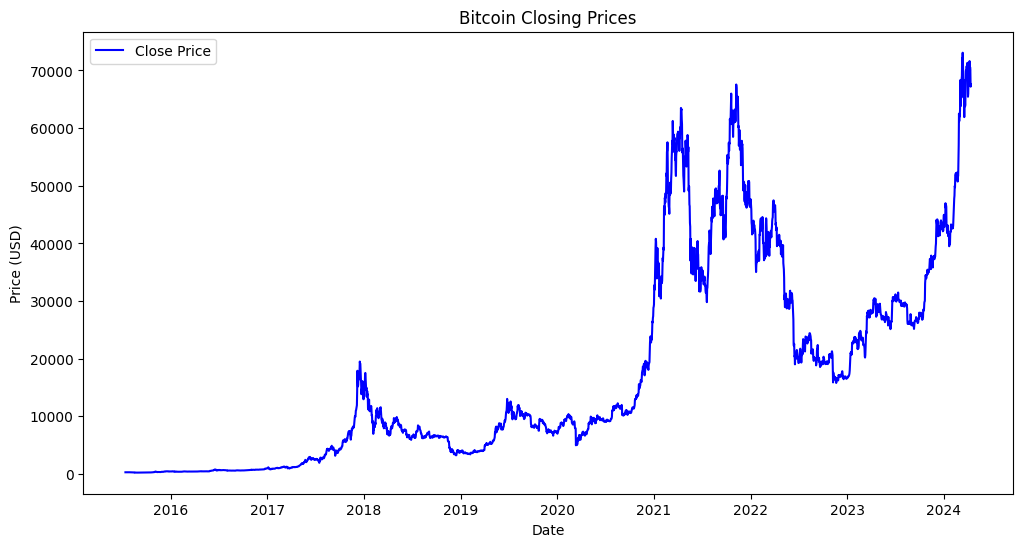

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
               Open          High           Low         Close     Adj Close  \
count   3197.000000   3197.000000   3197.000000   3197.000000   3197.000000   
mean   17234.515073  17638.235947  16805.813669  17254.207426  17254.207426   
std    17605.052417  18030.330417  17141.094999  17622.473481  17622.473481   
min      210.067993    226.320999    199.567001    210.494995    210.494995   
25%     3631.170166   3685.305664   3585.060059   3631.040039   3631.040039   
50%     9471.213867   9655.073242   9263.069336   9477.641602   9477.641602   
75%    28087.175781  28532.830078  27563.876953  28168.089844  28168.089844   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.197000e+03  
mean   1.867636e+10  
std    1.940326e+10  
min    1.271260e+07  
25%    1.976040e+09  
50%    1.530460e+10  
75%    2.924455e+10  
max    3.

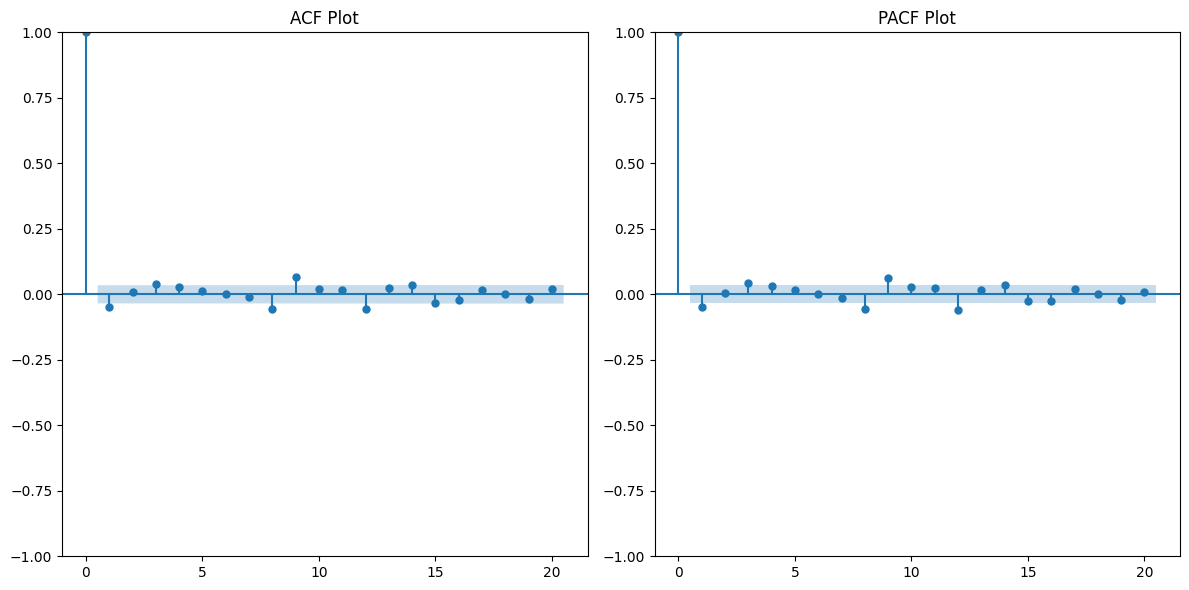

Лучшие параметры: {'regressor__alpha': 1.0}
Валидация - MSE: 2627415.6698779976, MAE: 1150.8557784978746, R^2: 0.9850772970686392
Тест - MSE: 910614.0485427259, MAE: 561.4581679512789, R^2: 0.9948689161102056


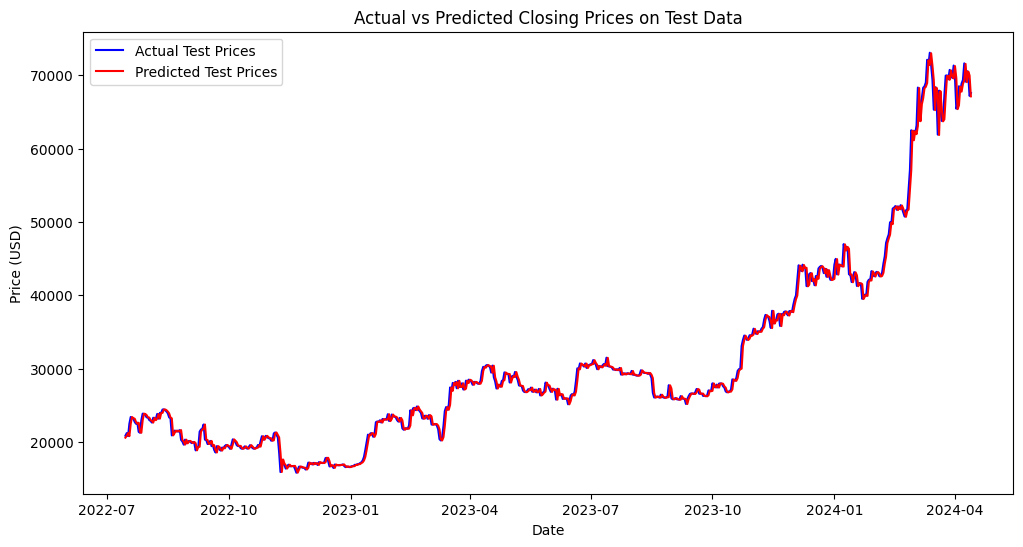

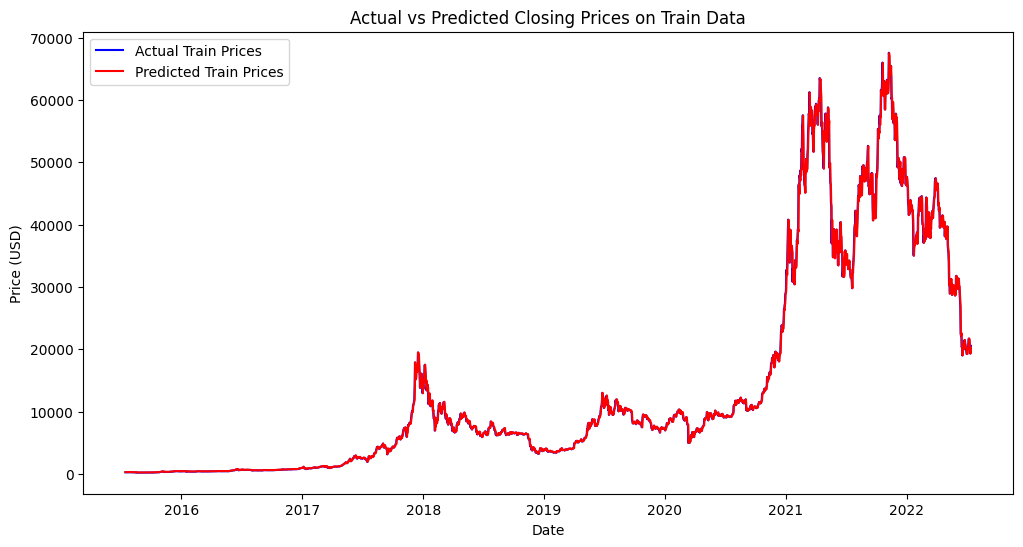

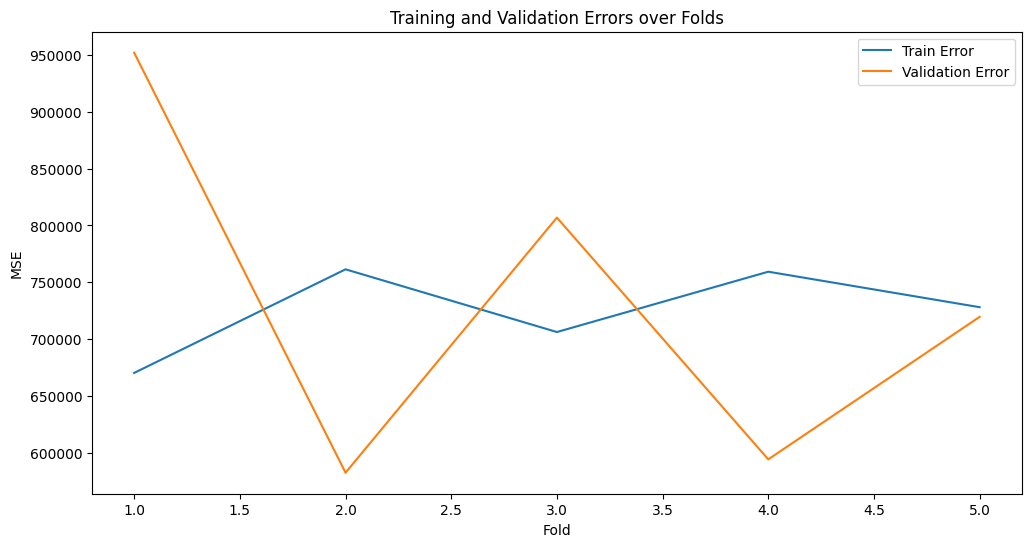

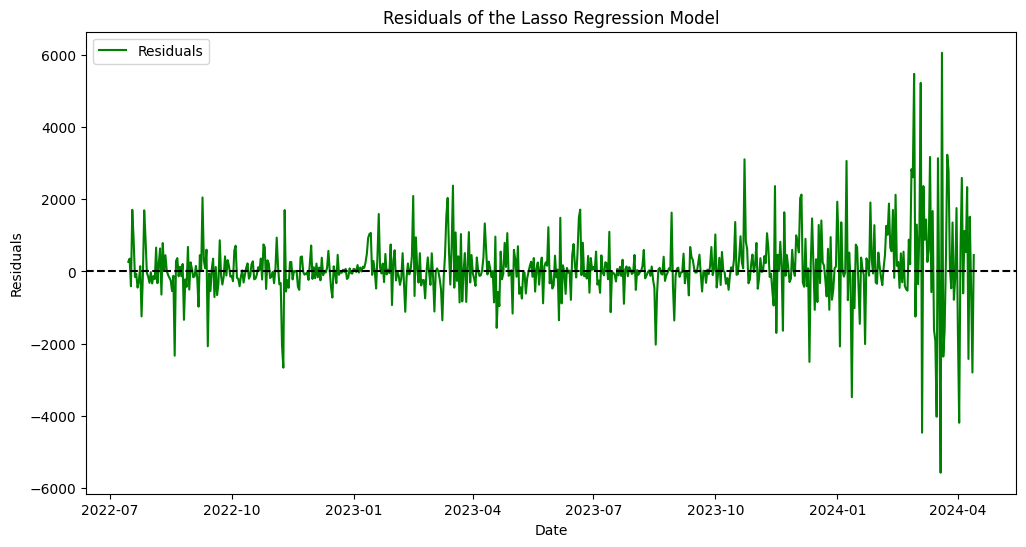

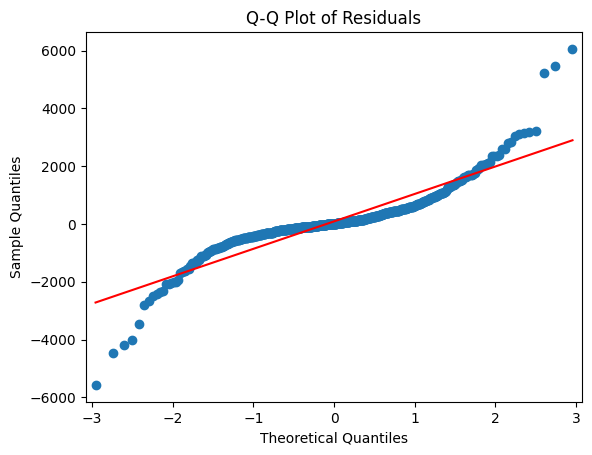

{'LM Statistic': 112.10025288943574, 'LM Test p-value': 4.547150986962236e-25, 'F-Statistic': 67.65590724673518, 'F-Test p-value': 2.292070475403907e-27}


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Загрузка данных
data = pd.read_csv("/content/BTC-USD.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Проверка пропусков и статистики
print(data.isnull().sum())
print(data.describe())

# Функция проверки стационарности и автоматического дифференцирования
def test_stationarity(timeseries, max_diff=5):
    for i in range(max_diff):
        result = adfuller(timeseries)
        print(f'Differencing {i} times:')
        labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
        for label, val in zip(labels, result):
            print(f'{label}: {val}')
        if result[1] <= 0.05:
            print("Ряд стационарен (отклоняем нулевую гипотезу)")
            return timeseries
        else:
            print("Ряд нестационарен (не отклоняем нулевую гипотезу), выполняем дифференцирование.")
            timeseries = timeseries.diff().dropna()

    print("Достигнуто максимальное количество дифференцирований. Ряд может быть нестационарен.")
    return timeseries

# Проверка стационарности для закрывающих цен
stationary_series = test_stationarity(data['Close'])

# ACF и PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(stationary_series.dropna(), lags=20, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(stationary_series.dropna(), lags=20, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

# Лаговые переменные
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data.dropna(inplace=True)

# Признаки и целевая переменная
X = data[['Lag1', 'Lag2']]
y = data['Close']

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=False)

# Настройка пайплайна с масштабированием и Lasso регрессией
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

# Подбор гиперпараметров с помощью K-Fold кросс-валидации и масштабированием
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # Параметр регуляризации для Lasso
}
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Лучшая модель и её параметры
best_model = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

# Прогнозирование на валидационной выборке
y_val_pred = best_model.predict(X_val)

# Оценка модели на валидационной выборке
val_mse, val_mae, val_r2 = mean_squared_error(y_val, y_val_pred), mean_absolute_error(y_val, y_val_pred), r2_score(y_val, y_val_pred)
print(f'Валидация - MSE: {val_mse}, MAE: {val_mae}, R^2: {val_r2}')

# Обучение модели на всех тренировочных данных
best_model.fit(X_train_val, y_train_val)

# Прогнозирование на тестовых данных
y_test_pred = best_model.predict(X_test)

# Оценка модели на тестовых данных
test_mse, test_mae, test_r2 = mean_squared_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)
print(f'Тест - MSE: {test_mse}, MAE: {test_mae}, R^2: {test_r2}')

# Визуализация прогнозов на тестовых данных
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Test Prices', color='blue')
plt.plot(y_test.index, y_test_pred, label='Predicted Test Prices', color='red')
plt.title('Actual vs Predicted Closing Prices on Test Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Визуализация прогнозов на тренировочных данных
y_train_val_pred = best_model.predict(X_train_val)
plt.figure(figsize=(12, 6))
plt.plot(y_train_val.index, y_train_val, label='Actual Train Prices', color='blue')
plt.plot(y_train_val.index, y_train_val_pred, label='Predicted Train Prices', color='red')
plt.title('Actual vs Predicted Closing Prices on Train Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# График обучения (зависимость ошибки от эпох)
train_errors, val_errors = [], []
for train_index, val_index in kfold.split(X_train_val):
    X_fold_train, X_fold_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_fold_train, y_fold_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    best_model.fit(X_fold_train, y_fold_train)
    train_errors.append(mean_squared_error(y_fold_train, best_model.predict(X_fold_train)))
    val_errors.append(mean_squared_error(y_fold_val, best_model.predict(X_fold_val)))

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(train_errors) + 1), train_errors, label='Train Error')
plt.plot(range(1, len(val_errors) + 1), val_errors, label='Validation Error')
plt.title('Training and Validation Errors over Folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Анализ остатков
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, label='Residuals', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals of the Lasso Regression Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Тест на гетероскедастичность
bp_test = het_breuschpagan(residuals, sm.add_constant(X_test))
labels = ['LM Statistic', 'LM Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)

Результаты теста на гетероскедастичность для модели Lasso-регрессии представлены ниже:

- **LM Statistic**: 112.10
- **LM Test p-value**: 4.55 × 10⁻²⁵
- **F-Statistic**: 67.66
- **F-Test p-value**: 2.29 × 10⁻²⁷

### Интерпретация результатов

1. **LM Statistic**: Значение статистики Лагранжа (LM Statistic) указывает на наличие значительных отклонений от предположения о гомоскедастичности остатков. Более высокие значения свидетельствуют о возможной гетероскедастичности.

2. **LM Test p-value**: Полученное значение p-value (приблизительно 4.55 × 10⁻²⁵) позволяет отвергнуть нулевую гипотезу о постоянной дисперсии остатков. Это подтверждает наличие гетероскедастичности в анализируемых данных.

3. **F-Statistic и F-Test p-value**: Параметры F-статистики поддерживают выводы, полученные с использованием LM-теста. Очень низкое значение p-value (2.29 × 10⁻²⁷) дополнительно указывает на необходимость пересмотра модели, поскольку предположение о постоянной дисперсии остатков явно нарушено.

### Рекомендации

С учетом выявленной гетероскедастичности рекомендуется рассмотреть следующие подходы:

- **Преобразование зависимой переменной**: Применение логарифмического или квадратного преобразования целевой переменной может способствовать стабилизации дисперсии.

- **Использование альтернативных моделей**: Рассмотрение взвешенной регрессии или других методов, учитывающих гетероскедастичность, может улучшить качество модели.

- **Анализ остатков**: Рекомендуется провести более детализированный анализ остатков для выявления причин гетероскедастичности и возможных переменных, которые следует учитывать в модели.

Для прогнозирования будущих значений временного ряда с использованием модели Lasso, необходимо создать набор данных с лаговыми переменными на основе имеющихся данных и затем использовать модель для предсказания. В вашем случае, у вас уже есть созданные лаговые переменные `Lag1` и `Lag2`. Вам нужно будет:

1. Определить количество шагов вперед, которые вы хотите прогнозировать.
2. Создать новый набор данных с использованием последних доступных значений.
3. Использовать обученную модель для предсказания.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but 

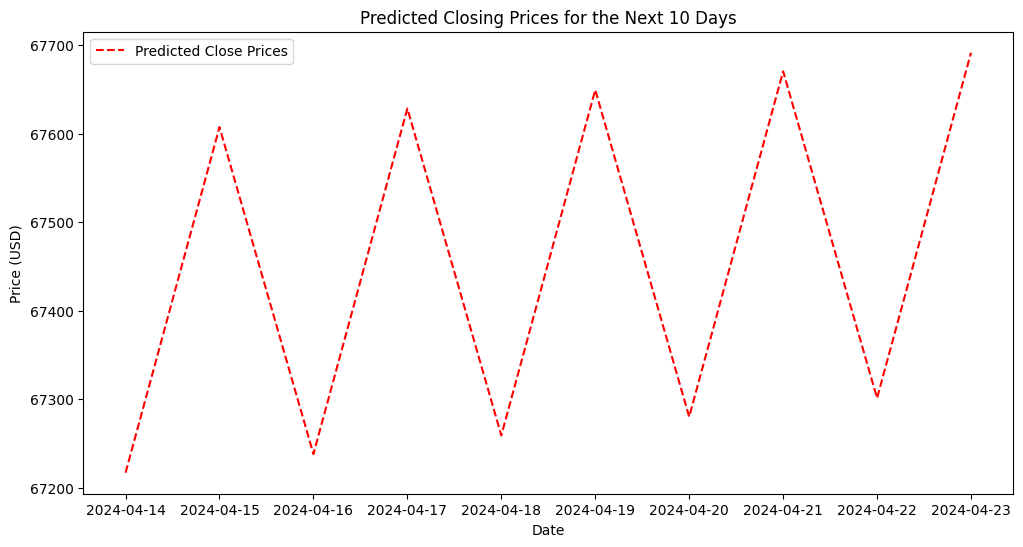

In [16]:
# Определение количества шагов вперед для прогнозирования
n_steps = 10  # Прогнозируем на 10 дней вперед

# Получение последних значений для создания новых лагов
last_values = data[['Close']].tail(2).values.flatten()

# Создание списка для хранения прогнозов
predictions = []

# Прогнозирование
for _ in range(n_steps):
    new_row = [last_values[0], last_values[1]]  # Lag1, Lag2
    new_row = np.array(new_row).reshape(1, -1)

    next_pred = best_model.predict(new_row)[0]
    predictions.append(next_pred)

    # Обновление лагов для следующей итерации
    last_values = np.roll(last_values, shift=-1)
    last_values[-1] = next_pred

# Индексы для прогноза
last_date = data.index[-1]
predicted_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_steps)

# Создание DataFrame с прогнозами
predicted_df = pd.DataFrame(data=predictions, index=predicted_dates, columns=['Predicted Close'])

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(predicted_df.index, predicted_df['Predicted Close'], label='Predicted Close Prices', color='red', linestyle='--')
plt.title(f'Predicted Closing Prices for the Next {n_steps} Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### Объяснение кода:
1. **Количество шагов**: Вы можете изменить значение `n_steps`, чтобы прогнозировать больше или меньше дней вперед.
2. **Цикл прогнозирования**: Для каждого шага вперед создается новый набор лагов, который обновляется с каждым предсказанием.
3. **График**: Визуализация фактических и предсказанных значений на одном графике для удобства анализа.


##Многомерная линейная регрессия

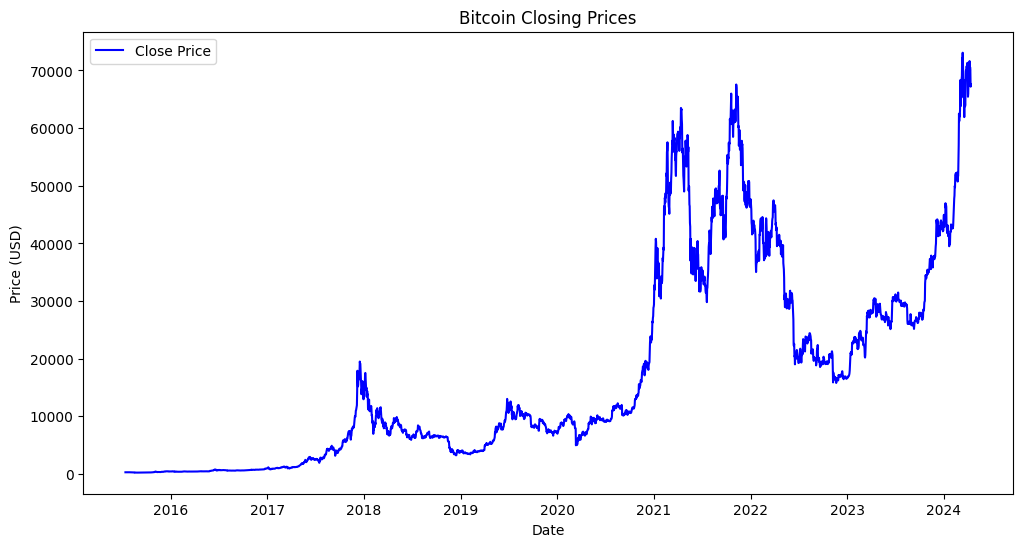

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
               Open          High           Low         Close     Adj Close  \
count   3197.000000   3197.000000   3197.000000   3197.000000   3197.000000   
mean   17234.515073  17638.235947  16805.813669  17254.207426  17254.207426   
std    17605.052417  18030.330417  17141.094999  17622.473481  17622.473481   
min      210.067993    226.320999    199.567001    210.494995    210.494995   
25%     3631.170166   3685.305664   3585.060059   3631.040039   3631.040039   
50%     9471.213867   9655.073242   9263.069336   9477.641602   9477.641602   
75%    28087.175781  28532.830078  27563.876953  28168.089844  28168.089844   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.197000e+03  
mean   1.867636e+10  
std    1.940326e+10  
min    1.271260e+07  
25%    1.976040e+09  
50%    1.530460e+10  
75%    2.924455e+10  
max    3.

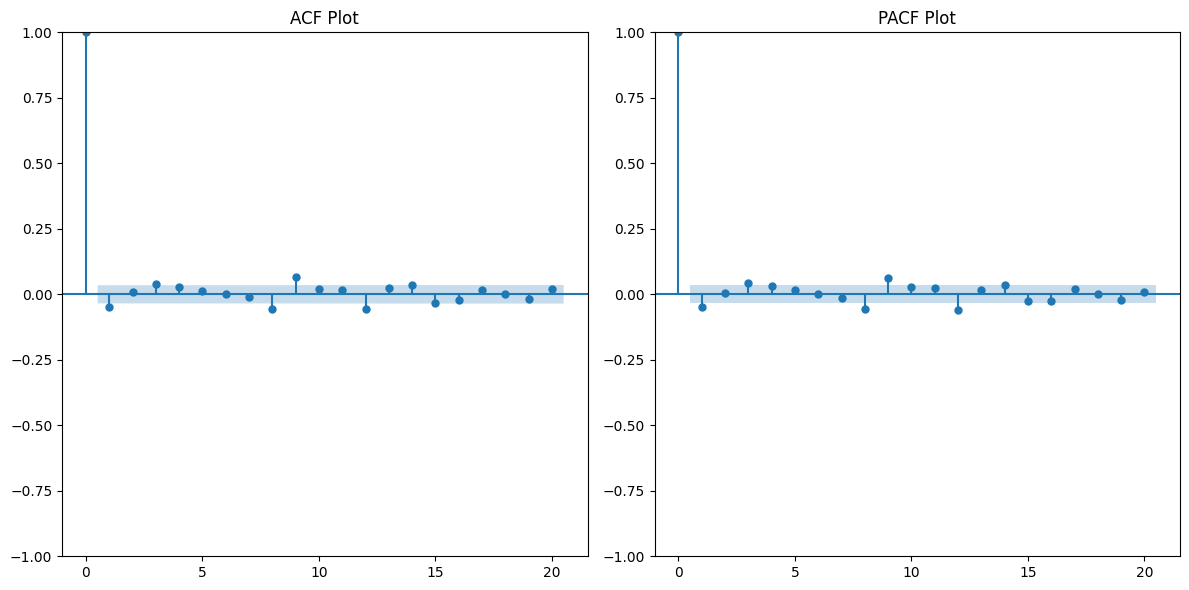

Валидация - MSE: 2649710.5050071245, MAE: 1159.387903317839, R^2: 0.9849506710439299
Тест - MSE: 904304.8607042758, MAE: 558.9119865913515, R^2: 0.994904466815938


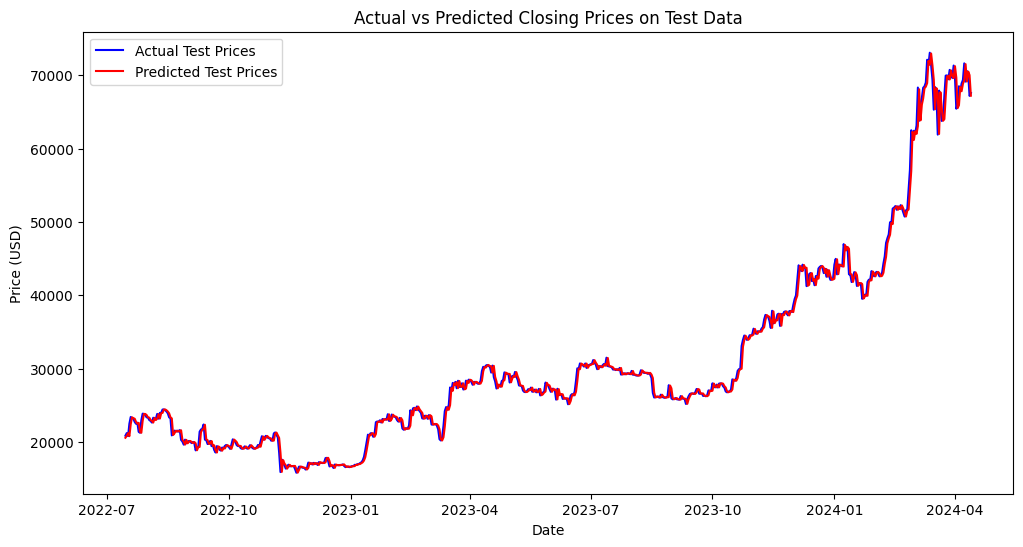

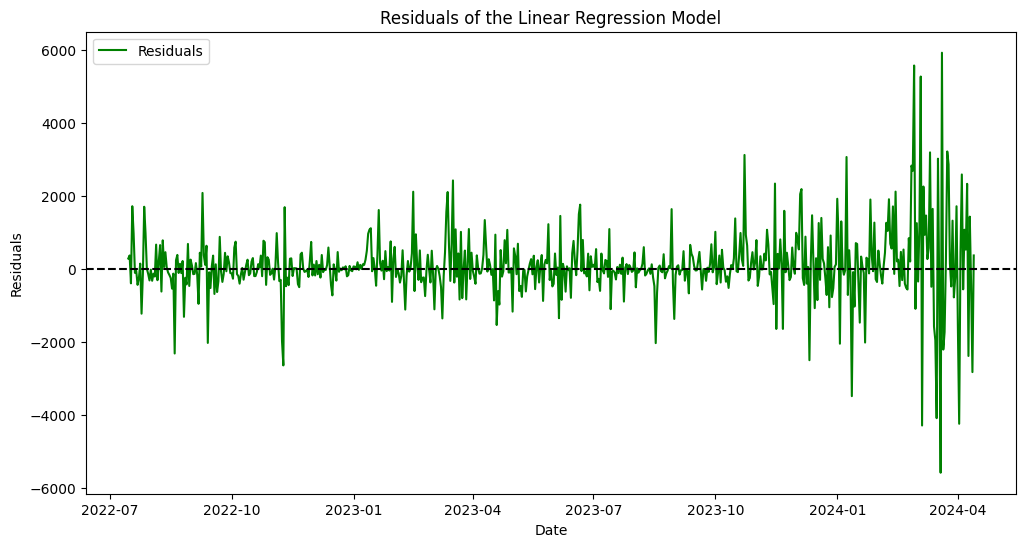

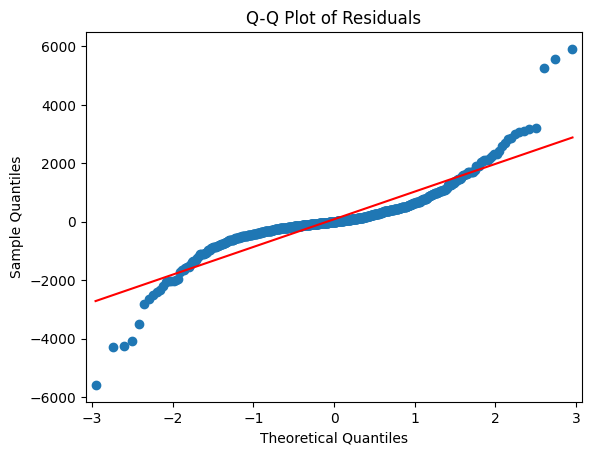

{'LM Statistic': 225.92567325066554, 'LM Test p-value': 1.0512256132212814e-48, 'F-Statistic': 115.7683522665644, 'F-Test p-value': 8.351127919428751e-60}


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Загрузка данных
data = pd.read_csv("/content/BTC-USD.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Проверка пропусков и статистики
print(data.isnull().sum())
print(data.describe())

# Функция проверки стационарности и автоматического дифференцирования
def test_stationarity(timeseries, max_diff=5):
    for i in range(max_diff):
        result = adfuller(timeseries)
        print(f'Differencing {i} times:')
        labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
        for label, val in zip(labels, result):
            print(f'{label}: {val}')
        if result[1] <= 0.05:
            print("Ряд стационарен (отклоняем нулевую гипотезу)")
            return timeseries
        else:
            print("Ряд нестационарен (не отклоняем нулевую гипотезу), выполняем дифференцирование.")
            timeseries = timeseries.diff().dropna()

    print("Достигнуто максимальное количество дифференцирований. Ряд может быть нестационарен.")
    return timeseries

# Проверка стационарности для закрывающих цен
stationary_series = test_stationarity(data['Close'])

# ACF и PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(stationary_series.dropna(), lags=20, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(stationary_series.dropna(), lags=20, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

# Лаговые переменные и дополнительные признаки
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data['Volume'] = data['Volume']  # Пример использования дополнительной переменной
data.dropna(inplace=True)

# Признаки и целевая переменная
X = data[['Lag1', 'Lag2', 'Volume']]
y = data['Close']

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=False)

# Настройка пайплайна с масштабированием и линейной регрессией
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Подбор гиперпараметров (если требуется, для линейной регрессии их нет)
# Здесь можно использовать GridSearchCV, если были бы дополнительные параметры

# Обучение модели
pipeline.fit(X_train, y_train)

# Прогнозирование на валидационной выборке
y_val_pred = pipeline.predict(X_val)

# Оценка модели на валидационной выборке
val_mse, val_mae, val_r2 = mean_squared_error(y_val, y_val_pred), mean_absolute_error(y_val, y_val_pred), r2_score(y_val, y_val_pred)
print(f'Валидация - MSE: {val_mse}, MAE: {val_mae}, R^2: {val_r2}')

# Обучение модели на всех тренировочных данных
pipeline.fit(X_train_val, y_train_val)

# Прогнозирование на тестовых данных
y_test_pred = pipeline.predict(X_test)

# Оценка модели на тестовых данных
test_mse, test_mae, test_r2 = mean_squared_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)
print(f'Тест - MSE: {test_mse}, MAE: {test_mae}, R^2: {test_r2}')

# Визуализация прогнозов на тестовых данных
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Test Prices', color='blue')
plt.plot(y_test.index, y_test_pred, label='Predicted Test Prices', color='red')
plt.title('Actual vs Predicted Closing Prices on Test Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Анализ остатков
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, label='Residuals', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals of the Linear Regression Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Тест на гетероскедастичность
bp_test = het_breuschpagan(residuals, sm.add_constant(X_test))
labels = ['LM Statistic', 'LM Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)

Результаты теста на гетероскедастичность показывают следующее:

- **LM Statistic**: 225.93
- **LM Test p-value**: $1.05 \times 10^{-48}$
- **F-Statistic**: 115.77
- **F-Test p-value**: $8.35 \times 10^{-60}$

Эти значения указывают на наличие гетероскедастичности в ваших остатках. Поскольку p-value для обоих тестов (LM и F) значительно меньше 0.05, мы можем отклонить нулевую гипотезу, которая утверждает, что остатки имеют постоянную дисперсию (гомоскедастичность).

### Рекомендации:
1. **Трансформация переменных**: Попробуйте применить логарифмическую или квадратную корень трансформацию к зависимой переменной.
2. **Использование весовой регрессии**: Вы можете использовать модели, которые учитывают гетероскедастичность, например, взвешенную линейную регрессию.
3. **Робастные стандартные ошибки**: Если вы продолжаете использовать обычную линейную регрессию, рассмотрите возможность применения робастных стандартных ошибок для получения корректных оценок значимости.


## Weighted Least Squares (WLS)

Weighted Least Squares (WLS) — это метод регрессии, который используется для оценки параметров модели, когда наблюдения имеют разные уровни вариации или надежности. В отличие от обычного метода наименьших квадратов, который предполагает, что все наблюдения имеют одинаковую дисперсию, WLS позволяет учитывать вес каждого наблюдения.

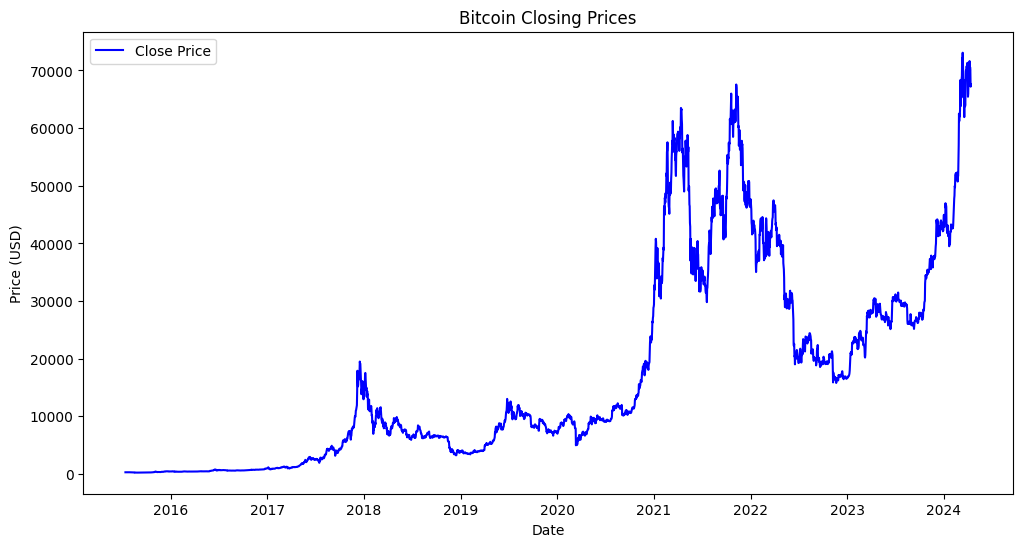

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
               Open          High           Low         Close     Adj Close  \
count   3197.000000   3197.000000   3197.000000   3197.000000   3197.000000   
mean   17234.515073  17638.235947  16805.813669  17254.207426  17254.207426   
std    17605.052417  18030.330417  17141.094999  17622.473481  17622.473481   
min      210.067993    226.320999    199.567001    210.494995    210.494995   
25%     3631.170166   3685.305664   3585.060059   3631.040039   3631.040039   
50%     9471.213867   9655.073242   9263.069336   9477.641602   9477.641602   
75%    28087.175781  28532.830078  27563.876953  28168.089844  28168.089844   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.197000e+03  
mean   1.867636e+10  
std    1.940326e+10  
min    1.271260e+07  
25%    1.976040e+09  
50%    1.530460e+10  
75%    2.924455e+10  
max    3.

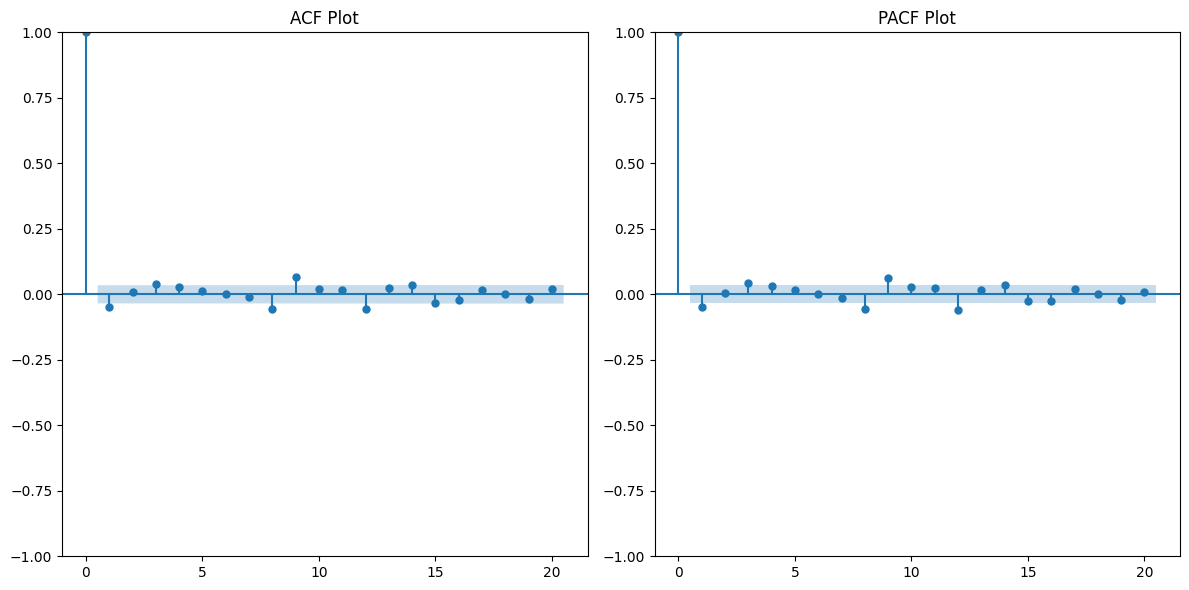

Валидация - MSE: 2619388.000642903, MAE: 1145.7286586742034, R^2: 0.9851228911193255
Тест - MSE: 905834.3935529415, MAE: 559.1175886216065, R^2: 0.9948958482784014


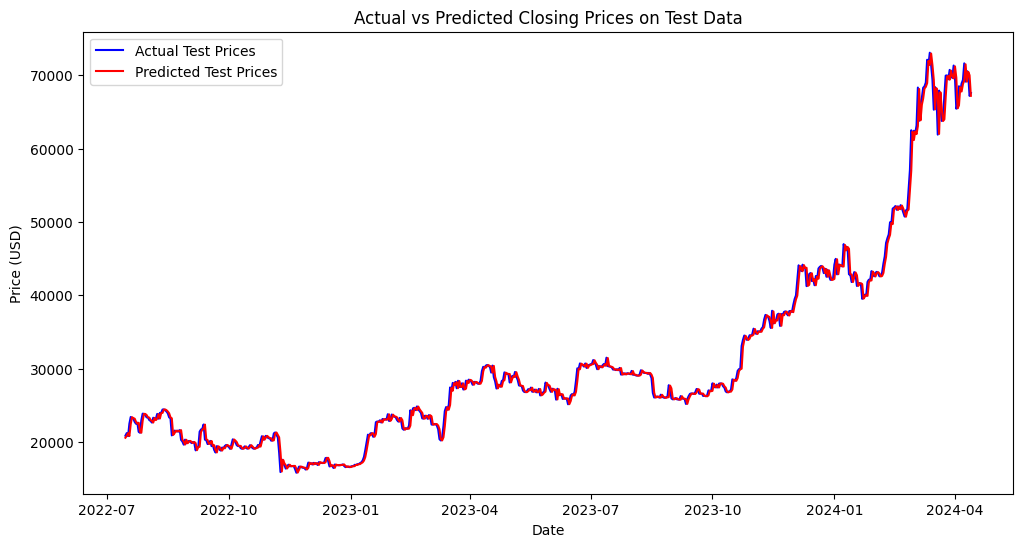

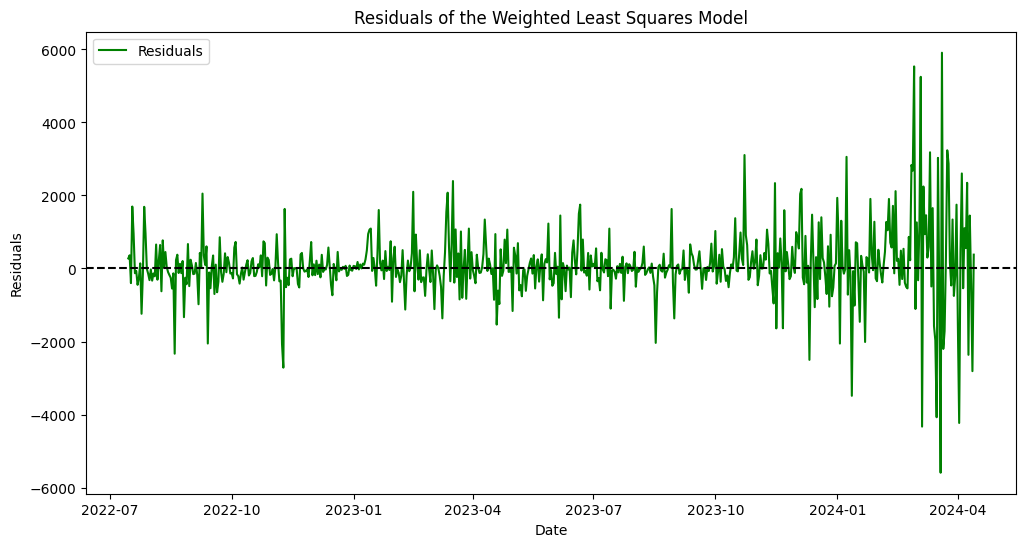

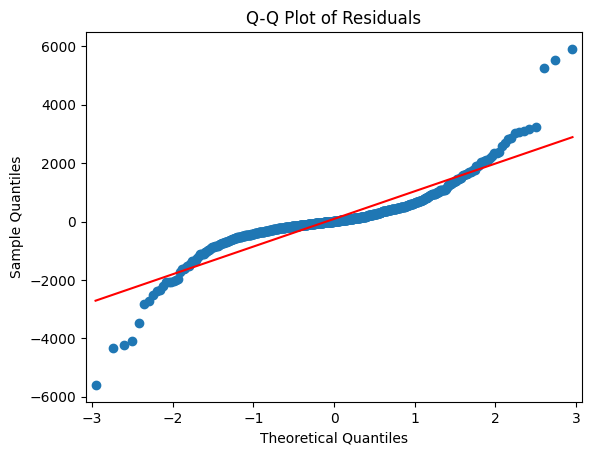

{'LM Statistic': 110.59383850506653, 'LM Test p-value': 9.657241730609142e-25, 'F-Statistic': 66.55645449915588, 'F-Test p-value': 5.682124477207201e-27}


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Загрузка данных
data = pd.read_csv("/content/BTC-USD.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Проверка пропусков и статистики
print(data.isnull().sum())
print(data.describe())

# Функция проверки стационарности и автоматического дифференцирования
def test_stationarity(timeseries, max_diff=5):
    for i in range(max_diff):
        result = adfuller(timeseries)
        print(f'Differencing {i} times:')
        labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
        for label, val in zip(labels, result):
            print(f'{label}: {val}')
        if result[1] <= 0.05:
            print("Ряд стационарен (отклоняем нулевую гипотезу)")
            return timeseries
        else:
            print("Ряд нестационарен (не отклоняем нулевую гипотезу), выполняем дифференцирование.")
            timeseries = timeseries.diff().dropna()

    print("Достигнуто максимальное количество дифференцирований. Ряд может быть нестационарен.")
    return timeseries

# Проверка стационарности для закрывающих цен
stationary_series = test_stationarity(data['Close'])

# ACF и PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(stationary_series.dropna(), lags=20, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(stationary_series.dropna(), lags=20, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

# Лаговые переменные
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data.dropna(inplace=True)

# Признаки и целевая переменная
X = data[['Lag1', 'Lag2']]
y = data['Close']

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=False)

# Веса для весовой регрессии (например, можно использовать обратные квадратные ошибки)
weights = 1 / (y_train_val.var() + 1e-5)  # Веса на основе дисперсии целевой переменной

# Обучение весовой линейной регрессии
model = sm.WLS(y_train_val, sm.add_constant(X_train_val), weights=weights).fit()

# Прогнозирование на валидационной выборке
y_val_pred = model.predict(sm.add_constant(X_val))

# Оценка модели на валидационной выборке
val_mse, val_mae, val_r2 = mean_squared_error(y_val, y_val_pred), mean_absolute_error(y_val, y_val_pred), r2_score(y_val, y_val_pred)
print(f'Валидация - MSE: {val_mse}, MAE: {val_mae}, R^2: {val_r2}')

# Обучение модели на всех тренировочных данных
model = sm.WLS(y_train_val, sm.add_constant(X_train_val), weights=weights).fit()

# Прогнозирование на тестовых данных
y_test_pred = model.predict(sm.add_constant(X_test))

# Оценка модели на тестовых данных
test_mse, test_mae, test_r2 = mean_squared_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)
print(f'Тест - MSE: {test_mse}, MAE: {test_mae}, R^2: {test_r2}')

# Визуализация прогнозов на тестовых данных
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Test Prices', color='blue')
plt.plot(y_test.index, y_test_pred, label='Predicted Test Prices', color='red')
plt.title('Actual vs Predicted Closing Prices on Test Data')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Анализ остатков
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, label='Residuals', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals of the Weighted Least Squares Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Тест на гетероскедастичность
bp_test = het_breuschpagan(residuals, sm.add_constant(X_test))
labels = ['LM Statistic', 'LM Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)